# 衡量线性回归法的指标
2019/10/21 zx青

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

d:\python\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
d:\python\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
d:\python\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
d:\python\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
d:\python\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


### 糖尿病数据集

In [8]:
diabetes = datasets.load_diabetes()
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [9]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [11]:
# 只选取特征bmi体质指数进行分析
x = diabetes.data[:,3]

In [12]:
x.shape

(442,)

In [13]:
y = diabetes.target

In [14]:
y.shape

(442,)

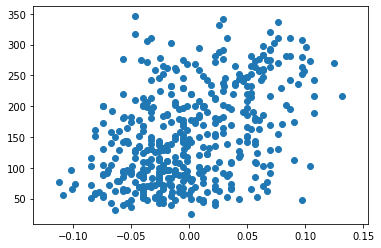

In [15]:
plt.scatter(x, y)
plt.show()

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [19]:
x_train.shape

(331,)

In [21]:
x_test.shape

(111,)

In [29]:
def fit(x_train, y_train):
    # 向量化计算
    x_mean = np.mean(x_train)
    y_mean = np.mean(y_train)
    num = 0.0 # 分子
    d = 0.0 # 分母
    num = (x_train - x_mean).dot(y_train - y_mean)
    d = (x_train - x_mean).dot(x_train - x_mean)

    a = num / d
    b = y_mean - a * x_mean
    
    return a, b
    

In [31]:
a, b =fit(x_train, y_train)

In [32]:
a

670.4757137278352

In [33]:
b

151.6609463580118

In [34]:
y_train_predict = a * x_train + b

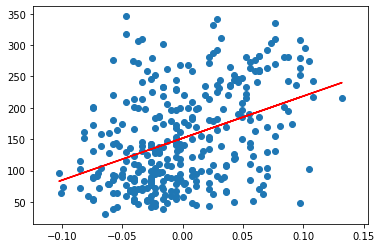

In [35]:
plt.scatter(x_train, y_train)
plt.plot(x_train, y_predict, color='r')
plt.show()

In [36]:
y_test_predict = a * x_test + b

### MSE

![MSE](./MSE.jpg)

In [38]:
mse_test = np.sum((y_test-y_test_predict) **2)/len(y_test)
mse_test

4260.904235878564

### RMSE

![RMSE](./RMSE.jpg)

In [40]:
from math import sqrt

rmse_test = sqrt(mse_test)
rmse_test

65.27560214872447

### MAE

![MAE](./MAE.jpg)

In [42]:
mae_test = np.sum(np.absolute(y_test - y_test_predict)) / len(y_test)
mae_test

54.789225309039566

### scikit-learn 中的MSE和MAE

In [43]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [44]:
mean_squared_error(y_test, y_test_predict)

4260.904235878564

In [45]:
mean_absolute_error(y_test, y_test_predict)

54.789225309039566

### R Squared

![R_2](./R_2.jpg)

In [46]:
1 - mean_squared_error(y_test, y_test_predict) / np.var(y_test)   # np.var()计算方差

0.2769692015067565